#Implement feature matching algorithms

In [10]:
pip install opencv-python opencv-python-headless

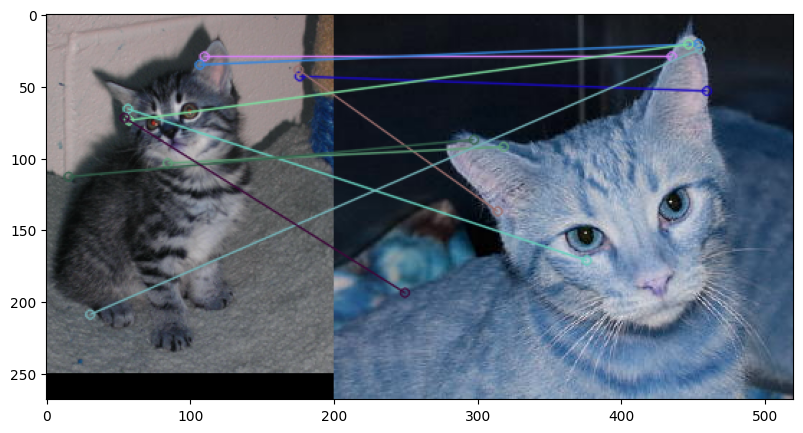

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_features(image1, image2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect SIFT features and compute descriptors.
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # Initialize and use BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # Sort matches by distance. Best come first.
    matches = sorted(matches, key=lambda x:x.distance)

    # Draw first 10 matches.
    match_img = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=2)

    # Show the matched image
    plt.figure(figsize=(10,5))
    plt.imshow(match_img)
    plt.show()

# Load your images
image1 = cv2.imread('/content/1073.jpg')
image2 = cv2.imread('/content/14.jpg')

match_features(image1, image2)
